# Lab 4 Image Registration

In this lab exercise, you will look at image registration using hand-picked selected features.

You are asked to write a short (no more than 2 pages) report of your work, answering specific questions, and showing example images. This work is not assessed (it will not count towards your module mark) but you will get formative feedback. 

In this exercise, we will be performing image registration on two different views of a fish embryo. To achieve the following steps need to be taken:

- Load in the two images:
    - fish-vis.tif (transmission image, visible light)
    - fish-cfp-#.tif (the floating image that is to be registered to the base image. This is a grey-level version of a fluorescence image with Cyan Fluorescent Protein - CFP)

- Use the existing skeleton code to find matching key points across the two images.
    - This may involve some trial and error of manually entering coordinates and updating the figure

- Perform transformation estimation using the estimated keypoints
- Register the two images using a warp function
- Display an overlayed image (blue and red) 

Example of overlay:

![Example image](example.png)

In [26]:

from skimage import io
import skimage as ski
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgb2gray, gray2rgb

# Load Images

img_vis = io.imread('FishImageFiles/fish-vis.tif') # replace None
img_cfp = io.imread('FishImageFiles/fish-cfp-1.tif')

In [27]:
print(img_vis.shape)
print(img_cfp.shape)


(331, 549)
(331, 549, 3)


In [28]:
img_vis = img_vis / 255
img_cfp = rgb2gray(img_cfp)

(331, 549)


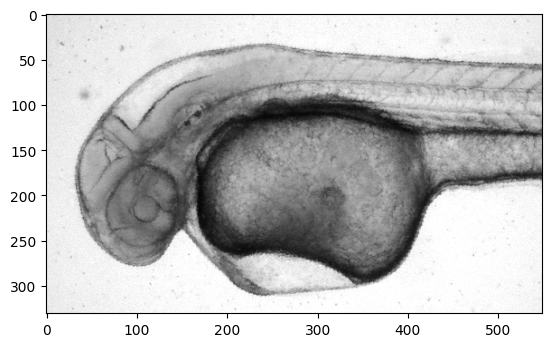

In [29]:
print(img_vis.shape)
plt.imshow(img_vis, cmap='gray')

(331, 549)


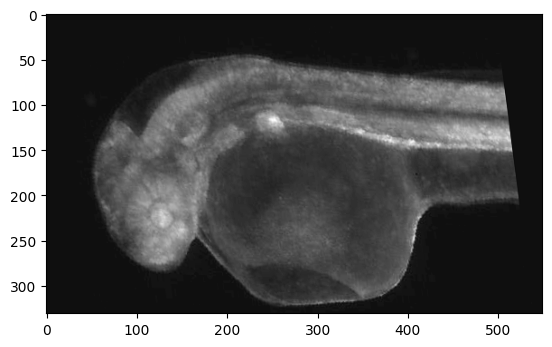

In [30]:
print(img_cfp.shape)
plt.imshow(img_cfp, cmap='gray')

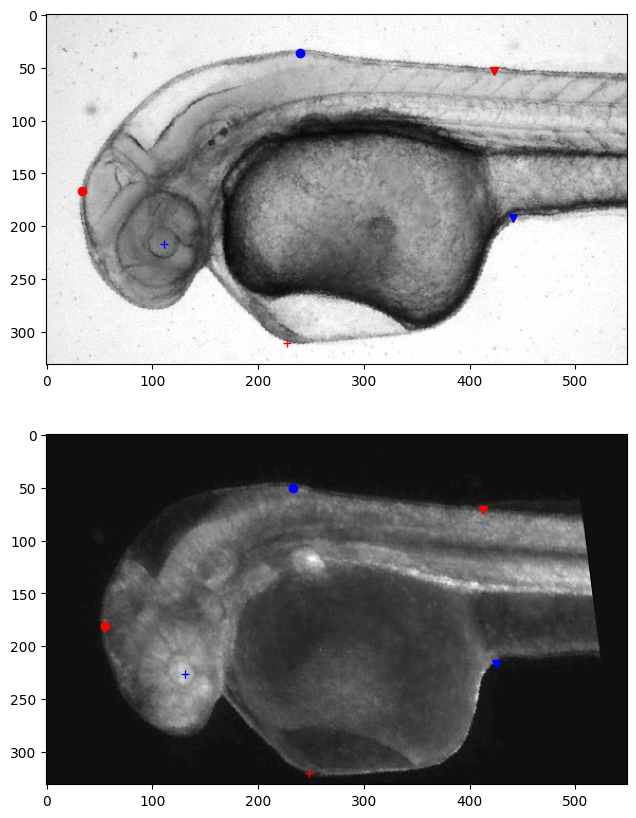

In [31]:
## Extract Keypoints

fig,axes = plt.subplots(2, 1,figsize=(10, 10))

#Fill in the key points array in the form as follows [[x1,y1],[x2,y2],[x3,y3]]
# keypointsA = [(170,45),(112,215), (36, 150), (435,50), (425, 200), (235,310)]
# keypointsB = [(165,53),(126,225), (53, 165), (402,68), (415, 217), (255,323)]

keypointsA = [[33, 167], [240, 36], [423, 53], [441, 192], [227, 310], [111, 217]]
keypointsB = [[55, 181], [233, 50], [413, 71], [425, 217], [248, 320], [131, 226]]

# Display the key points
symbols = ['ro','bo','rv','bv','r+','b+']
ax = axes.ravel()

for i in range(0,len(keypointsA)):
    ax[0].plot(keypointsA[i][0],keypointsA[i][1],symbols[i])
for i in range(0,len(keypointsB)):    
    ax[1].plot(keypointsB[i][0],keypointsB[i][1],symbols[i])

ax[0].imshow(img_vis, cmap='gray')
ax[1].imshow(img_cfp, cmap='gray')

In [32]:
## Check shape of images
print(img_vis.shape, img_vis.max())
print(img_cfp.shape, img_cfp.max())


(331, 549) 1.0
(331, 549) 0.6176470588235293


In [33]:
## Image and key points pairs
images_pairs = {
    'vis': (img_vis, np.array(keypointsA, dtype=np.float32)),
    'cfp': (img_cfp, np.array(keypointsB, dtype=np.float32))
}

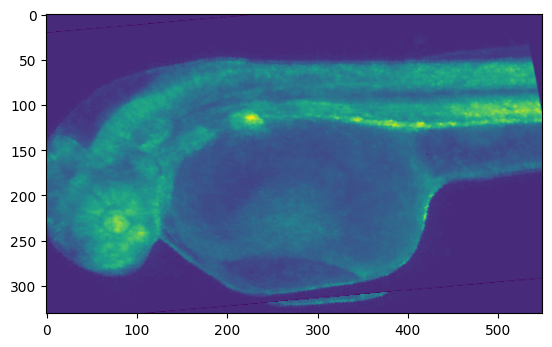

In [43]:
# Perform transformation estimation using the estimated keypoints
from skimage.transform import estimate_transform
from skimage.transform import warp
import cv2 as cv

# Target and source image
# NOTE: I need to go from img_cfp (2nd one) to img_vis (1st one)

image_source, source_points = images_pairs['cfp']  
image_target, target_points = images_pairs['vis']

nr, nc = image_source.shape

# Estimate the transformation matrix
# transform = estimate_transform('affine', source_points, target_points)
transform, _ = cv.estimateAffine2D(source_points, target_points)

# Apply the transformation to the image
# img_transformed = warp(image_source, transform)
img_transformed = cv.warpAffine(image_source, transform, (nc, nr))

def overlap_images(src, target):
    # src_color = cv.cvtColor(src, cv.COLOR_GRAY2RGB)
    overlap_image = src.copy()
    overlap_image[target > 0] = target[target > 0]
    return overlap_image

overlaped_image = overlap_images(image_source, img_transformed)

plt.imshow(overlaped_image)

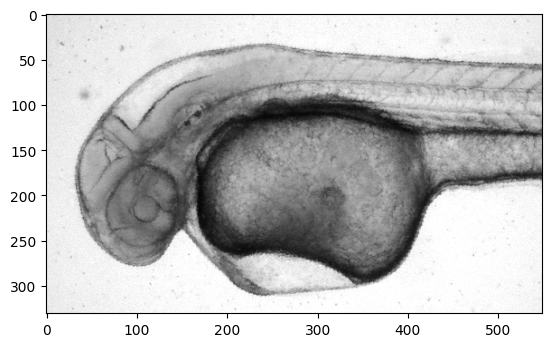

In [37]:
plt.imshow(image_source, cmap='gray')

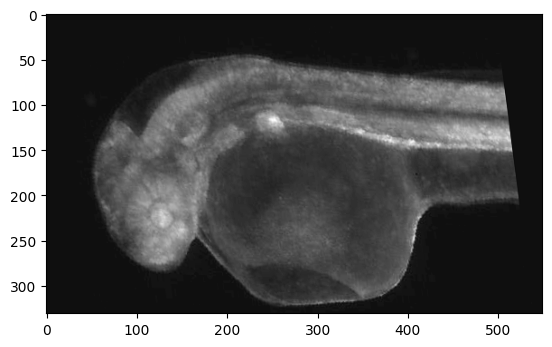

In [38]:
plt.imshow(image_target, cmap='gray')

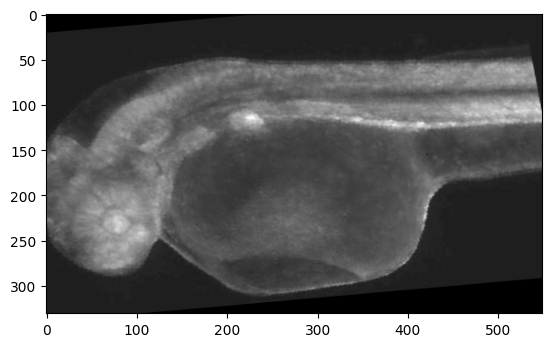

In [40]:
plt.imshow(img_transformed, cmap='gray')

In [115]:
# Create the overlayed image
overlayed_image = np.zeros_like(img_vis)
overlayed_image[..., 0] = img_vis  # Red channel
overlayed_image[..., 2] = img_cfp  # Blue channel

# Display the overlayed image
plt.imshow(overlayed_image)


ValueError: could not broadcast input array from shape (331,549) into shape (331,)

In [ ]:



# Create the overlayed images: https://scikit-image.org/docs/stable/auto_examples/registration/plot_opticalflow.html#sphx-glr-auto-examples-registration-plot-opticalflow-py

#Ouput the overlayed images


##### Question 1: What is the effect of increasing/decreasing the number of chosen control points in registration accuracy?

##### Question 2: How would you evaluate the accuracy of your registration?

##### Question 3: Other than Projective Transform, what are the other options and which one do you think works best?